# Object detection with TensorFlow Object Detection API
The [TensorFlow Object Detection API](https://github.com/tensorflow/models/tree/master/research/object_detection) is an open source framework built on top of TensorFlow that makes it easy to construct, train and deploy **object detection** models.

This is a Google Colab Notebook. Run it [here](https://colab.research.google.com).

Links:
   * [Installation of Tensorflow Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md)
   * [How to configure Tensorflow object detection API with google colab](https://chamaradodandeniya.wordpress.com/2019/04/16/how-to-configure-google-colab-for-object-detection-using-tensorflow)


## Prepare GPU configuration and Google Drive

### Enable GPU acceleration and Python 3.

Set GPU hardware acceleration in menu: `Runtime --> Change runtime type --> Hardware accelerator --> GPU --> Save`.

Set Python 3 in menu: `Runtime --> Change runtime type --> Runtime type --> Python 3 --> Save`.

In [1]:
# Downgrade TensorFlow to version 1.x,
# because version 2.0 has no attribute 'contrib'.
# For the 1.15 release, CPU and GPU support are included in a single package.
!pip install tensorflow==1.15rc2

# Check it
import sys
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
elif sys.version_info.major < 3:
    raise SystemError('Python 2.7 is out of date now')
else:
    print('OK')

OK


### Connect to Google Drive
Connect your Colab `*.ipynb` file to the [Google Drive](https://drive.google.com).
Go to appeared URL in a browser and enter your authorization code.

If you are able to access ,
your google drive files should be all under:
`Files -> /content/drive/My Drive/`

![Google Drive Access](https://raw.githubusercontent.com/foobar167/android/master/object_detection_demo/01_training_script/data/2019.10.07_google_drive_access.jpg)
![Google Drive](https://raw.githubusercontent.com/foobar167/android/master/object_detection_demo/01_training_script/data/2019.10.07_google_drive.jpg)


In [2]:
import os
from google.colab import drive

# Create some path names
home_dir = '/content/drive'
path = os.path.join(home_dir, 'My Drive/TFConfig')
research_dir = os.path.join(path, 'TFmodels/research')
object_detection_dir = os.path.join(research_dir, 'object_detection')

# Connect your Colab to the Google Drive
drive.mount(home_dir, force_remount=False)

# Create directory if not exist
if not os.path.isdir(path):
    os.makedirs(path)

# change directory to project path
%cd $path
# check current directory
%pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/TFConfig


'/content/drive/My Drive/TFConfig'

## Prepare the Tensorflow models repository

### Clone TensorFlow models
You can clone the [all tensorflow models](https://github.com/tensorflow/models) (422 MB) or you can use [Chamara Dodandeniya's repository](https://github.com/dodandeniya/TFmodels) (229 MB) which contains only Object detection API and Slim module for object detection.

In [5]:
# Remove previous TFmodels directory
!rm -rf 'TFmodels'
!git clone https://github.com/dodandeniya/TFmodels.git

Cloning into 'TFmodels'...
remote: Enumerating objects: 557, done.
remote: Counting objects: 100% (557/557), done.
remote: Compressing objects: 100% (379/379), done.
remote: Total 557 (delta 171), reused 547 (delta 170), pack-reused 0
Receiving objects: 100% (557/557), 107.63 MiB | 11.80 MiB/s, done.
Resolving deltas: 100% (171/171), done.
Checking out files: 100% (533/533), done.


### Compile the library and run unit test
Compile the object detection library using [`protoc`](https://manpages.debian.org/testing/protobuf-compiler/protoc.1.en.html) compiler.

`protoc` is a compiler for protocol buffers definitions files. It can can generate C++, Java and Python source code for the classes defined in PROTO_FILE.

Compile the proto files to Python files.

In [6]:
%cd $research_dir
!pwd
!protoc object_detection/protos/*.proto --python_out=.

/content/drive/My Drive/TFConfig/TFmodels/research
/content/drive/My Drive/TFConfig/TFmodels/research


Add `slim` and `object_detection` directories to the environment path and run unit test.

In [7]:
%cd $object_detection_dir
os.environ['PYTHONPATH'] += ":" + research_dir
os.environ['PYTHONPATH'] += ":" + object_detection_dir
os.environ['PYTHONPATH'] += ":" + os.path.join(research_dir, 'slim')
!echo $PYTHONPATH
!python builders/model_builder_test.py

/content/drive/My Drive/TFConfig/TFmodels/research/object_detection
/env/python:/content/drive/My Drive/TFConfig/TFmodels/research:/content/drive/My Drive/TFConfig/TFmodels/research/object_detection:/content/drive/My Drive/TFConfig/TFmodels/research/slim
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Running tests under Python 3.6.8: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_

### Executing object detection script
Execute script which was created based on the [`object_detection_tutorial.ipynb`](https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb) file.

For object detection [`ssdlite_mobilenet_v2_coco`](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) pre-trained model is used.

For image labeling `mscoco_label_map.pbtxt` from API is used.

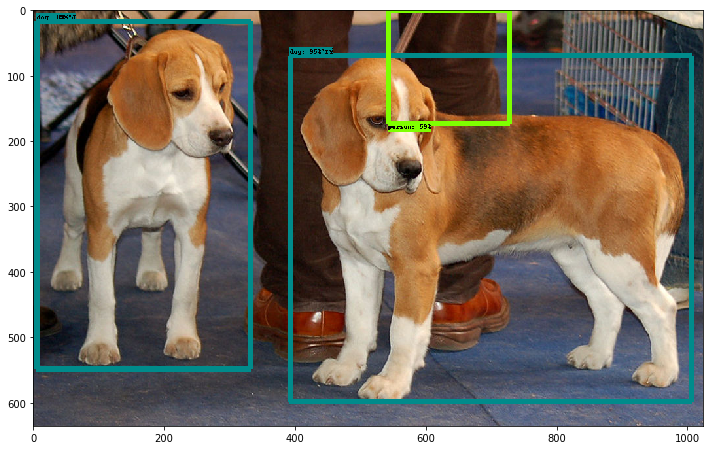

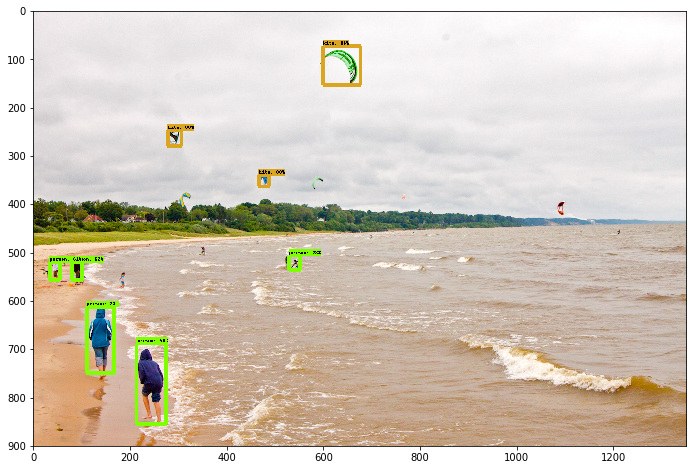

In [13]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from packaging import version
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if version.parse(tf.__version__) < version.parse('1.12.0'):
    raise ImportError('Upgrade your TensorFlow installation to version >= 1.12')

%matplotlib inline

from utils import label_map_util
from utils import visualization_utils as vis_util

# Model preparation

# What model to download.
MODEL_NAME = 'ssdlite_mobilenet_v2_coco_2018_05_09'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph.
# This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = '/content/drive/My Drive/TFConfig/TFmodels/research/object_detection/' + \
                       MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/content/drive/My Drive/TFConfig/TFmodels/research/object_detection/data',
                              'mscoco_label_map.pbtxt')

# Download Model

opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

# Load a (frozen) Tensorflow model into memory.

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

# Loading label map

category_index = label_map_util.create_category_index_from_labelmap(
    PATH_TO_LABELS, use_display_name=True)

# Helper code

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Detection

# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images,
# just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = os.path.join(object_detection_dir, 'test_images')
TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR,
                    'image{}.jpg'.format(i)) for i in range(1, 3)]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image
                # coordinates and fit the image size.
                real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[1], image.shape[2])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict, feed_dict={image_tensor: image})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # The array based representation of the image will be used later in
    # order to prepare the result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)


**Note**: If execute script for first time **it will not get any output**. Because it takes time to download pre-trained model. Execute it again and you'll get images with object detected boundaries.